In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

#custom imports
from prepare import prepare, run_qc
from extend import extend, run_qc2

### Prepare a 'balanced' quantum database superposition state $|\text{QDB}^{(k)}_{\text{empty}}\rangle$ 
We prepare the imbalanced database with $k$ indices and $l=0$ expected to be added indices, hence we obtain a balanced superposition state with balanced amplitudes (i.e., the amplitudes are all equal for the $k$ present elements in the superposition). Thereby we focus on the index register $I$ and thus, the following implementation is transforming the index qubits only. The whole operation can be described as follows:

$ \mathcal{H}_I \otimes \mathcal{H}_D \rightarrow \mathcal{H}_I \otimes \mathcal{H}_D $

$ |0 \rangle_{I \otimes D}  \xmapsto{P_{(k)}}  \frac{1}{\sqrt{k}} \sum_{j = 0}^{k-1} |j \rangle_I |0 \rangle_D =: |\text{QDB}^{(k)}_{\text{empty}}\rangle $

In [3]:
# define parameters 
k = 7
l = 0

# prepare a quantum database superpostiion state with k indices and l expected to be added indices
qc = prepare(k, l)
print("quantum circuit implementing the prepare function:", qc)

number of qubits t = 3
quantum circuit implementing the prepare function:       ┌────────────┐                                                »
q1_0: ┤ Ry(1.4274) ├─────■────────────■───────────o───────────o─────»
      └┬─────────┬─┘┌────┴─────┐┌─────┴─────┐┌────┴─────┐┌────┴────┐»
q1_1: ─┤ Ry(π/2) ├──┤ Ry(-π/2) ├┤ Ry(1.231) ├┤ Ry(-π/2) ├┤ Ry(π/2) ├»
       ├─────────┤  └──────────┘└───────────┘└──────────┘└─────────┘»
q1_2: ─┤ Ry(π/2) ├──────────────────────────────────────────────────»
       └─────────┘                                                  »
«                                         
«q1_0: ─────■───────────o───────────o─────
«           │           │           │     
«q1_1: ─────■───────────o───────────o─────
«      ┌────┴─────┐┌────┴─────┐┌────┴────┐
«q1_2: ┤ Ry(-π/2) ├┤ Ry(-π/2) ├┤ Ry(π/2) ├
«      └──────────┘└──────────┘└─────────┘


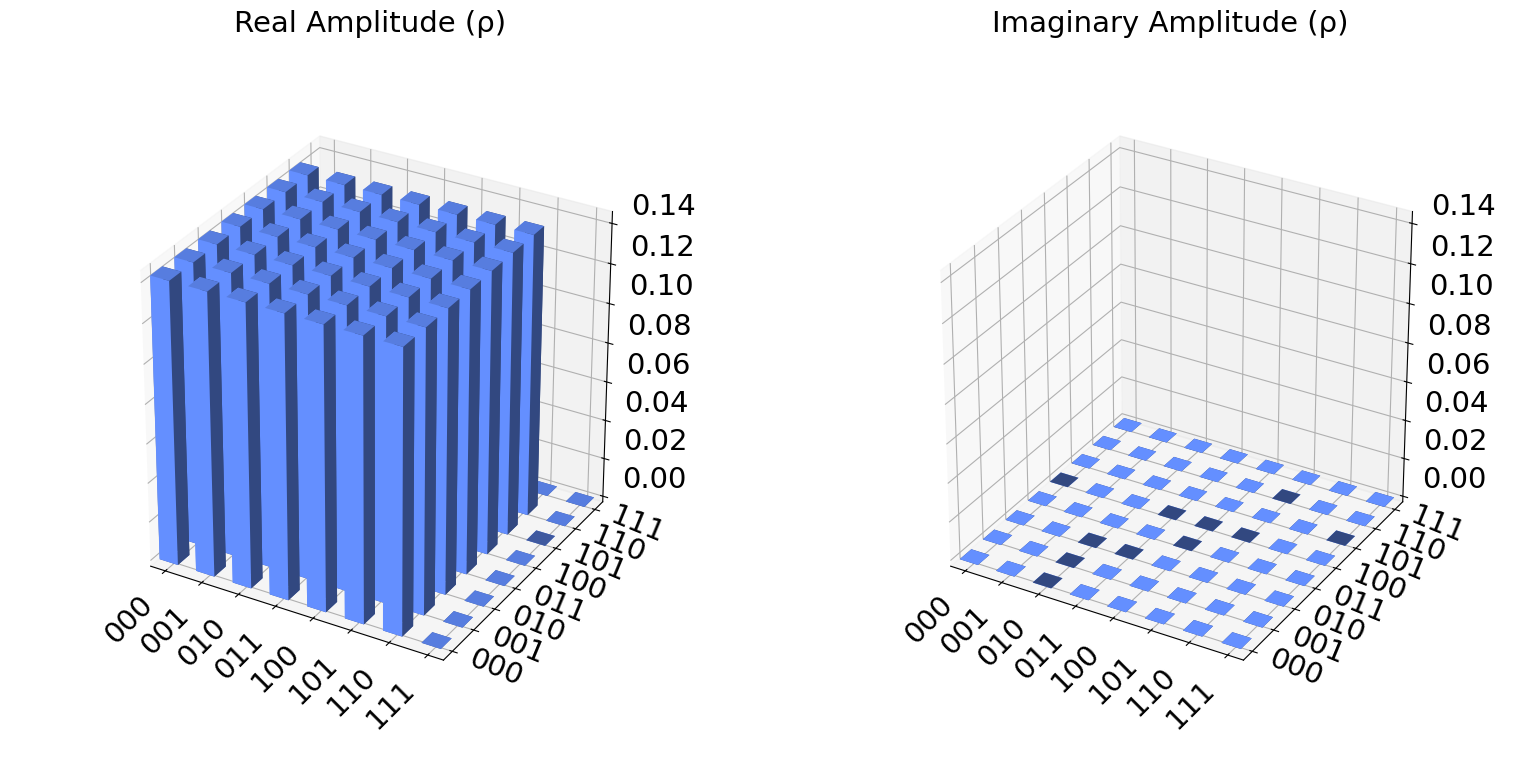

In [4]:
# example run for specific k, l
psi, psi_array = run_qc(qc, num_indices=k, revert_end=True)
# visualize the amplitudes
psi.draw('city')

### Prepare an 'imbalanced' quantum database superposition state 
with $k$ indices and $l \neq 0$ expected to be added indices, hence we obtain an imbalanced superposition state that is ready for extension

In [5]:
# define parameters 
k = 22
l = 5

# prepare state
qc = prepare(k, l)

number of qubits t = 5


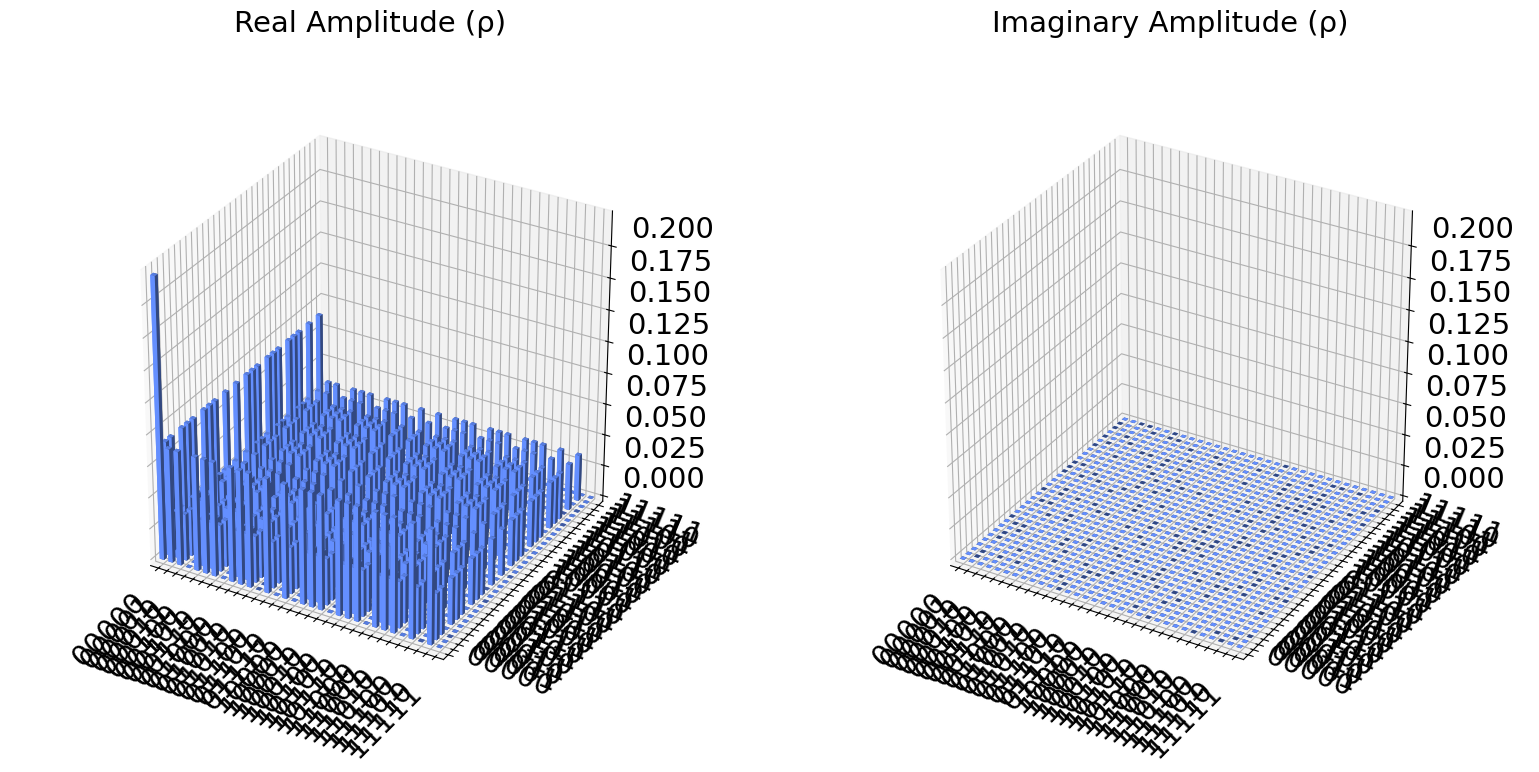

In [6]:
# example run for specific k, l
psi, psi_array = run_qc(qc, num_indices=k, revert_end=True)
# visualize the amplitudes
psi.draw('city')

### Eextend the 'imbalanced' quantum database state by $l$ new indices by adding one new ancilla qubit (i.e., z=1)

By using the extension protocol, we aim to achieve the following:

$ \mathcal{H}_I \otimes \mathcal{H}_D  \longrightarrow \mathcal{H}_{I'}  \otimes \mathcal{H}_D := \left(\mathcal{H}_{0} \otimes \mathcal{H}_{I} \right)  \otimes \mathcal{H}_D $

 $ |\text{QDB}^{(k)} \rangle = \sqrt{\frac{l+1}{k+l}} \ket{0}_I \ket{d_0}_D + \frac{1}{\sqrt{k+l}} \sum_{j=1}^{k-1}  \ket{j}_I \ket{d_j}_D \xmapsto{E_{(l)}} |\text{QDB}^{(k+l)} \rangle = \frac{1}{\sqrt{k+l}} \sum_{j=0}^{k+l-1}  \ket{j}_{I'} \ket{d_j}_D $ 
 
 with the restriction that $|d_j\rangle_D = | 0 \rangle_D \text{ for } \forall j > (k-1) \text{ and } j = 0 \, $.

 Thereby, we extend an initially imbalanced QDB state by $l$ new indices and retrieve a fully balanced QDB state. The following implementation is transforming the index qubits only.

In [7]:
# prepare imbalanced state with k indices and l expected to be added indices
k = 22
l = 5

# prepare state
qc = prepare(k, l)

# extend by l indices
qc = extend(qc, l)

number of qubits t = 5
num qubits before extension =  5
num qubits after extension =  6
number of qubits t = 3


We visualize again the result, note that the output is based on an endian encoding

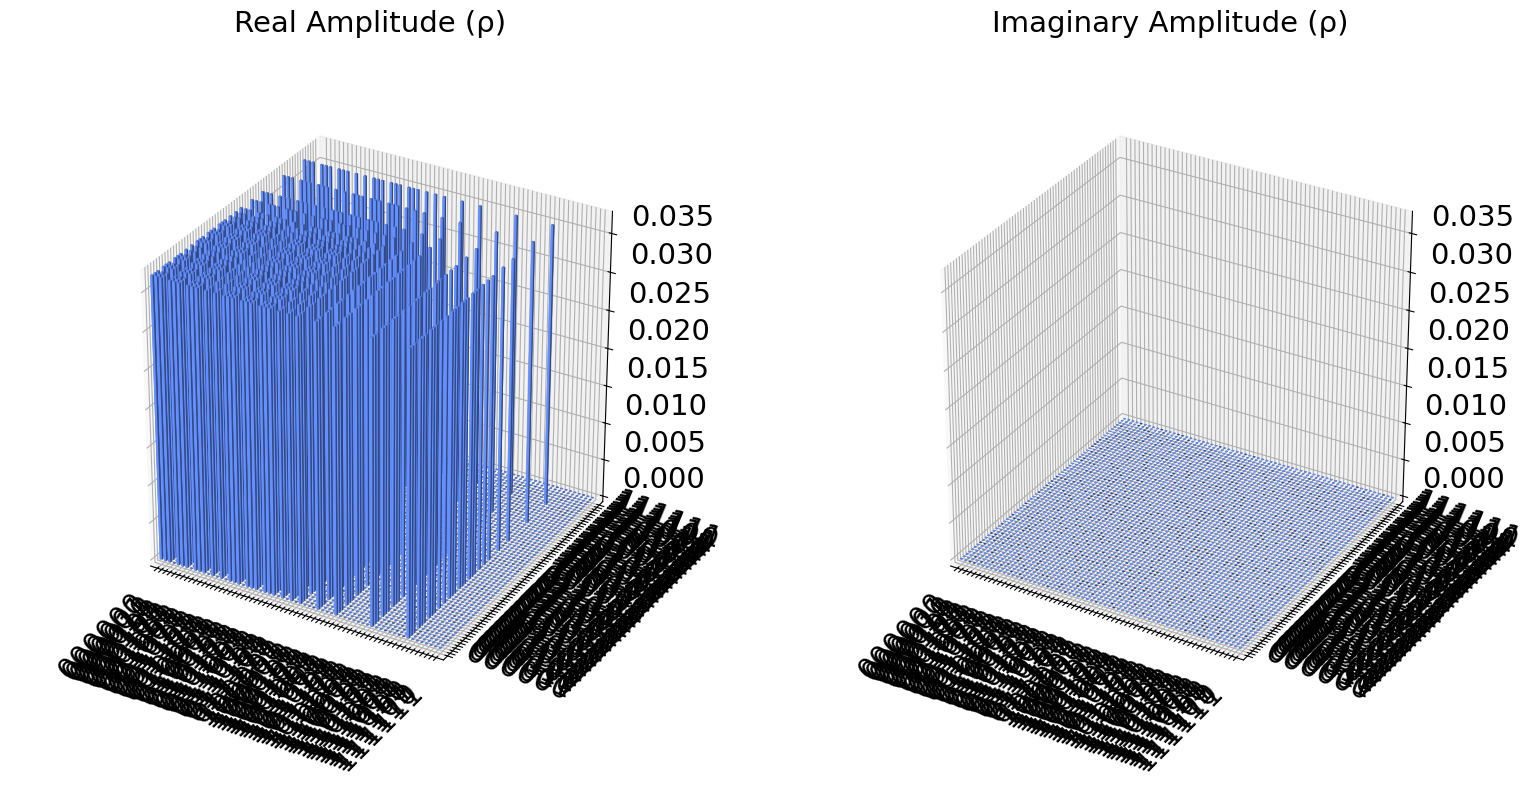

In [8]:
# example run for specific k, l
psi, psi_array = run_qc2(qc, k, l, revert_end=True)
# visualize the amplitudes with endian encoding
psi.draw('city')

### Print the array with ordered amplitudes (endian de-coding)

this array is filled with k elements counting from 0 to k and l elements counting from 2**ceil(log_2(k)) = t (no. qubits) to up to t+l

In [9]:
# print the amplitudes that are part of the superposition afet endian de-coding 
print('filled array (endian encoded):', psi_array)

filled array (endian e-coded): [ 0.1925  0.1925  0.1925  0.1925  0.1925  0.1925  0.1925  0.1925  0.1925
  0.1925  0.1925  0.1925  0.1925  0.1925  0.1925  0.1925  0.1925  0.1925
  0.1925  0.1925  0.1925  0.1925 -0.      0.     -0.     -0.     -0.
 -0.     -0.     -0.     -0.     -0.      0.1925  0.1925  0.1925  0.1925
  0.1925  0.     -0.     -0.     -0.      0.     -0.      0.      0.
  0.     -0.     -0.      0.      0.     -0.      0.      0.     -0.
 -0.     -0.     -0.     -0.     -0.     -0.     -0.     -0.      0.
 -0.    ]


number of qubits t = 5
num qubits before extension =  5
num qubits after extension =  6
number of qubits t = 3


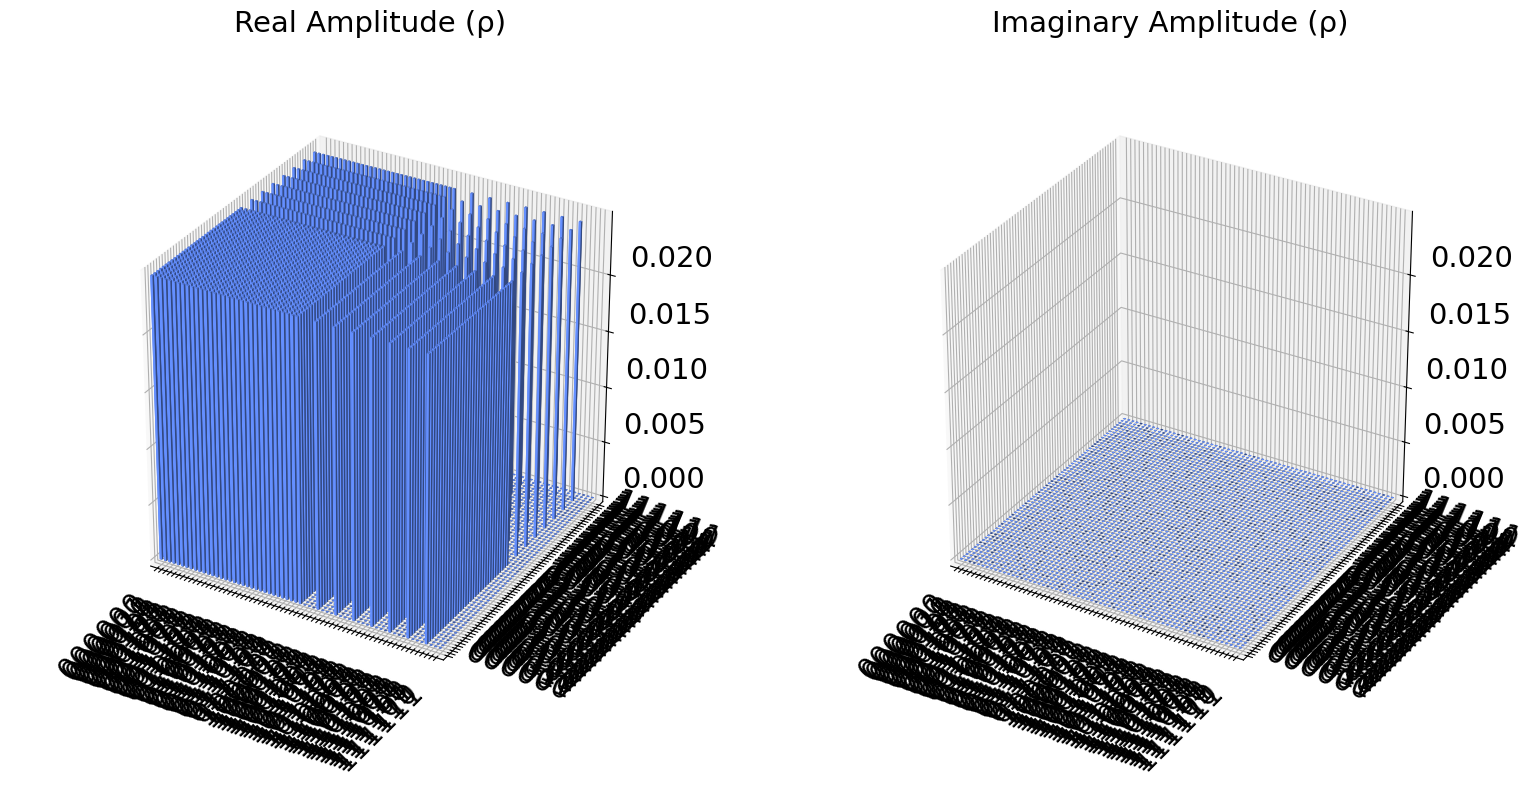

In [10]:
# if log(k) is a integer number the array is continuously filled
# prepare imbalanced state with k indices and l expected to be added indices
k = 2**5
l = 8

# prepare state
qc = prepare(k, l)

# extend by l indices
qc = extend(qc, l)
psi, psi_array = run_qc2(qc, k, l, revert_end=True)

# visualize the amplitgudes with endian encdoding 
psi.draw('city')


In [11]:
# print the amplitudes that are part of the superposition afet endian de-coding 
print('filled array (endian encoded):', psi_array)

filled array (endian e-coded): [ 0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581
  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581
  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581
  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581  0.1581
  0.1581  0.1581  0.1581  0.1581 -0.      0.      0.      0.     -0.
  0.      0.     -0.      0.      0.     -0.     -0.      0.      0.
 -0.     -0.     -0.     -0.     -0.     -0.     -0.      0.     -0.
 -0.    ]
